## Advertising Sales Channel Prediction

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel.

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
df = pd.read_csv('Advertising.csv')

#### Checking the first 5 and last five rows of the dataset

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df.shape

(200, 5)

In this dataset total number of rows are 200 and features/columns are 5

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Total 5 data Columns are present

In [7]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

all columns are float64 datatype

####   Checking the null value

In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

No null values are present in the dataset

#### statistics summary

In [9]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


This tell us about the mean , median of the different columns and also the min and max values.

Also the differene between the 75% percentile and max is high in some columns that means outliers are present.

## Exploratory Data Analysis

### 1. To check the missing values

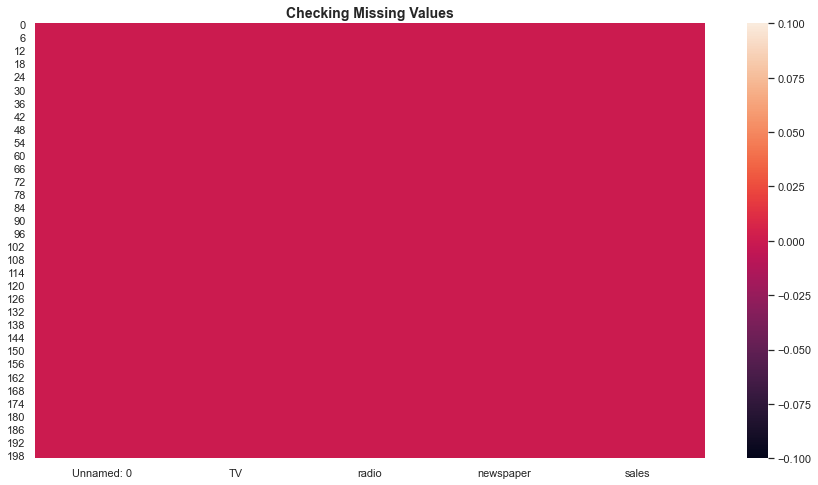

In [10]:
plt.figure(figsize=(15,8))
sns.set(style='whitegrid')
sns.heatmap(df.isnull())
plt.title('Checking Missing Values',fontsize=14,fontweight='bold')
plt.show()

There are no missing / null values present in the dataset.

###  Checking the correlation

In [11]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


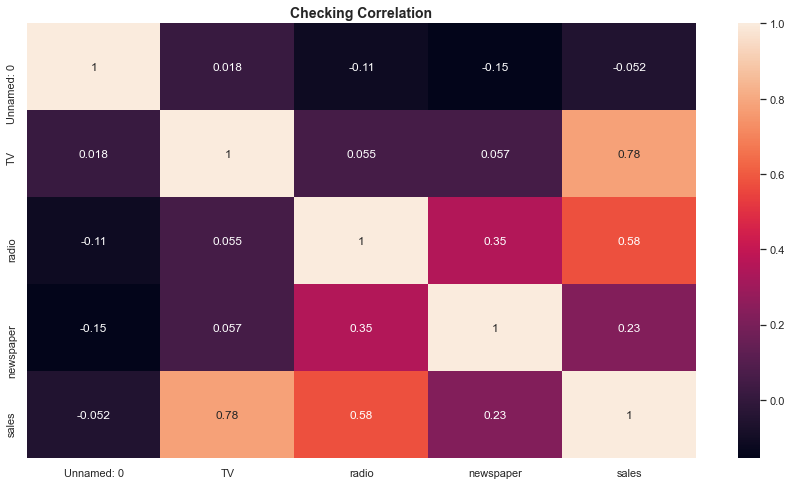

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Checking Correlation',fontsize=14,fontweight='bold')
plt.show()

This shows that sales is Highly correlated with the TV and also correlated with the radio but less correlated with the newspaper.

### Remove Unnecessary data

In [13]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [14]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Univariate Analysis

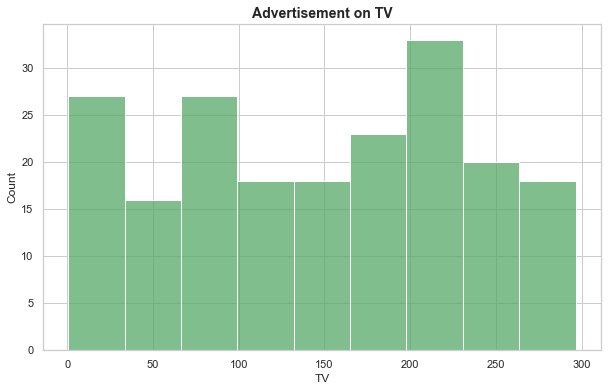

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df['TV'],color='g')
plt.title('Advertisement on TV',fontsize=14,fontweight='bold')
plt.show()

Here we can see that the TV used for advertising is maximum in between 200 to 225 i.e. 30+

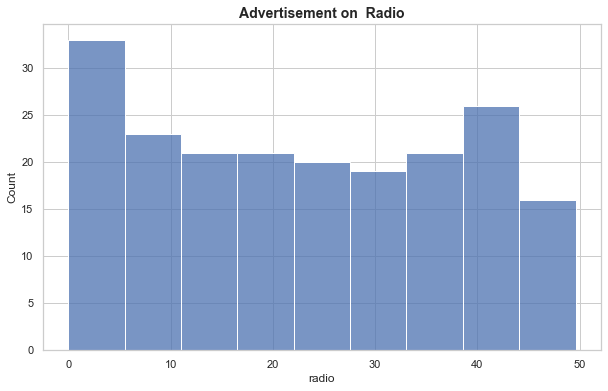

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['radio'],color='b')
plt.title('Advertisement on  Radio',fontsize=14,fontweight='bold')
plt.show()

Here we can see that the distibution of radio for advertisement is more in between 0 to 5 i.e. 30+

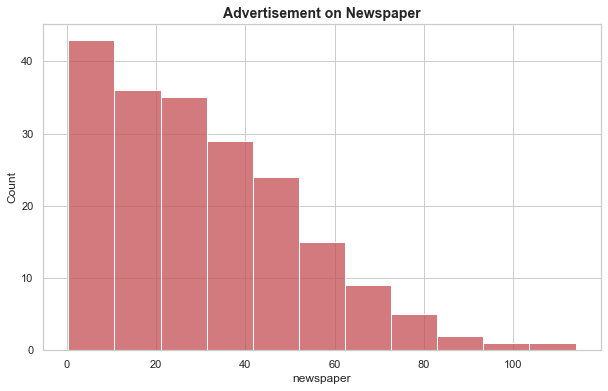

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df['newspaper'],color='r')
plt.title('Advertisement on Newspaper',fontsize=14,fontweight='bold')
plt.show()

Here we can see that newspaper from 1 to 10 are highly used for advertisement.

###  probability density function of Features

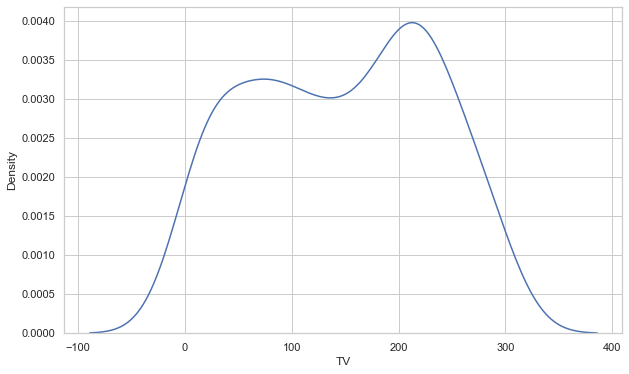

In [18]:

plt.figure(figsize=(10,6))
sns.distplot(df['TV'],kde=True,hist=False)
plt.show()

This graph shows the probability density of advertisment in Tv is approx. 40% at between 200 to 250 value.

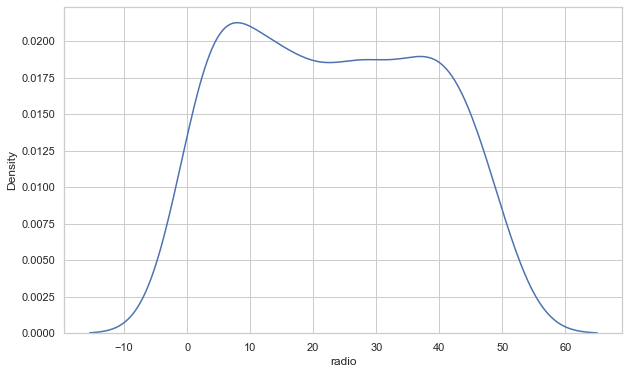

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(df['radio'],kde=True,hist=False)
plt.show()

here,graph shows that probability density of advertisement in radio is 20% at between 0 to 8

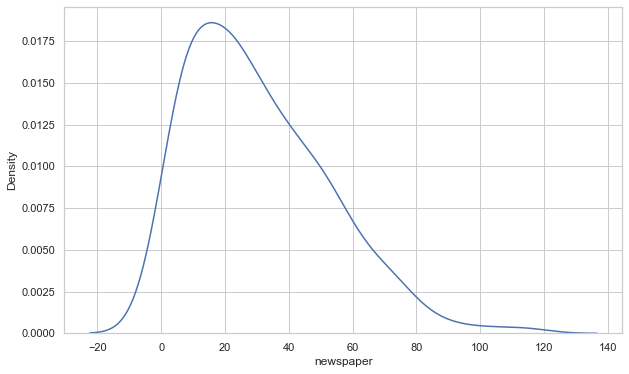

In [20]:
plt.figure(figsize=(10,6))
sns.distplot(df['newspaper'],kde=True,hist=False)
plt.show()

here,graph shows that probability density of advertisement in  newspaper is high at between  5 to 10 

### Boxplot

In [21]:
dfm=df.drop('sales',axis=1)

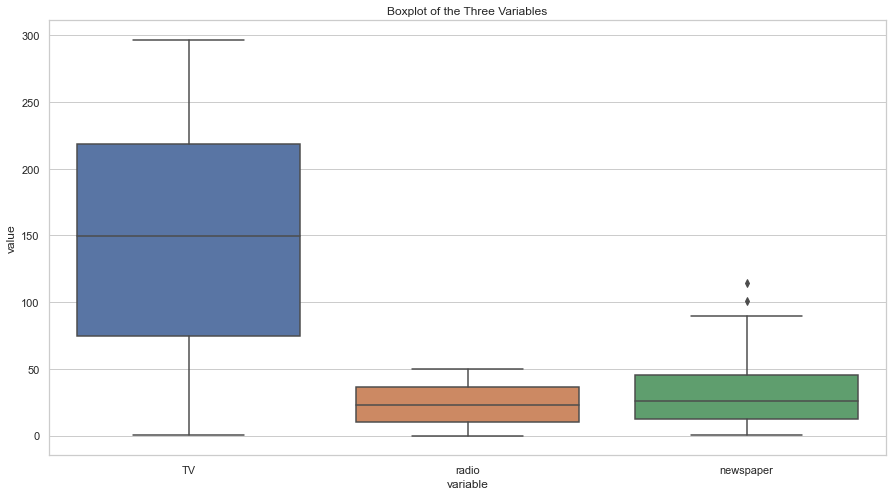

In [22]:
plt.figure(figsize=(15,8))
plt.title('Boxplot of the Three Variables')
sns.boxplot(x='variable',y='value',data=pd.melt(dfm))
plt.show()

A box-plot is a very useful and standardized way of displaying the distribution of data.
Here it shows, there are no considerable outliers present in data

### Bivariate Analysis

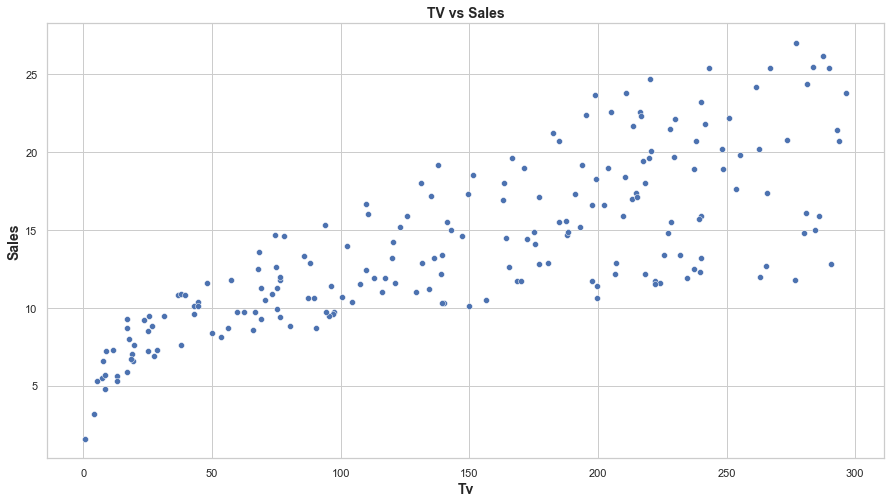

In [23]:
plt.figure(figsize=(15,8))
plt.title('TV vs Sales',fontsize=14,fontweight='bold')
sns.scatterplot(x='TV',y='sales',data=df)
plt.xlabel('Tv',fontsize=14,fontweight='bold')
plt.ylabel('Sales',fontsize=14,fontweight='bold')
plt.show()

As TV variable is increasing sales variable is also increasing therefore TV can help in predicting sales

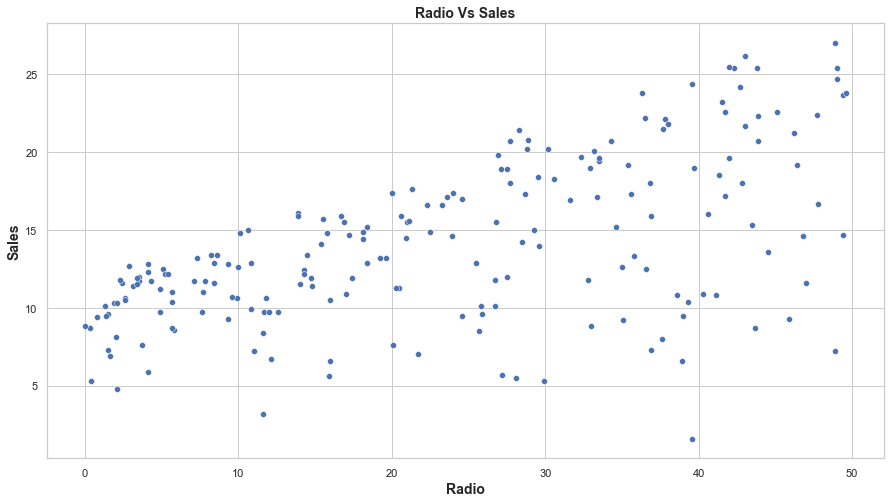

In [24]:
plt.figure(figsize=(15,8))
plt.title('Radio Vs Sales',fontsize=14,fontweight='bold')
sns.scatterplot(x='radio',y='sales',data=df)
plt.xlabel('Radio',fontsize=14,fontweight='bold')
plt.ylabel('Sales',fontsize=14,fontweight='bold')
plt.show()

As radio variable is increasing sales variable is also increasing therefore radio can help in predicting sales but there is noise too

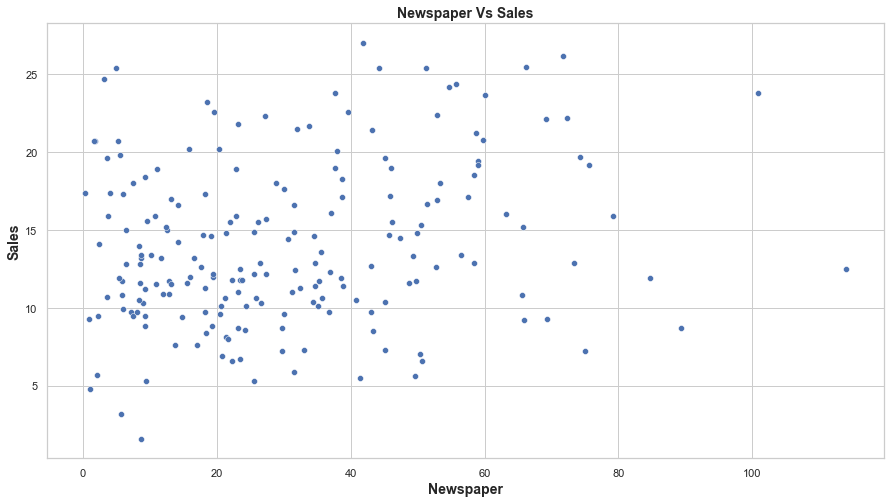

In [25]:
plt.figure(figsize=(15,8))
plt.title('Newspaper Vs Sales',fontsize=14,fontweight='bold')
sns.scatterplot(x='newspaper',y='sales',data=df)
plt.xlabel('Newspaper',fontsize=14,fontweight='bold')
plt.ylabel('Sales',fontsize=14,fontweight='bold')
plt.show()

 As newspaper variable is increasing sales variable is also increasing therefore newspaper can help in predicting sales but newspaper is help least

###  Multivariate Analysis

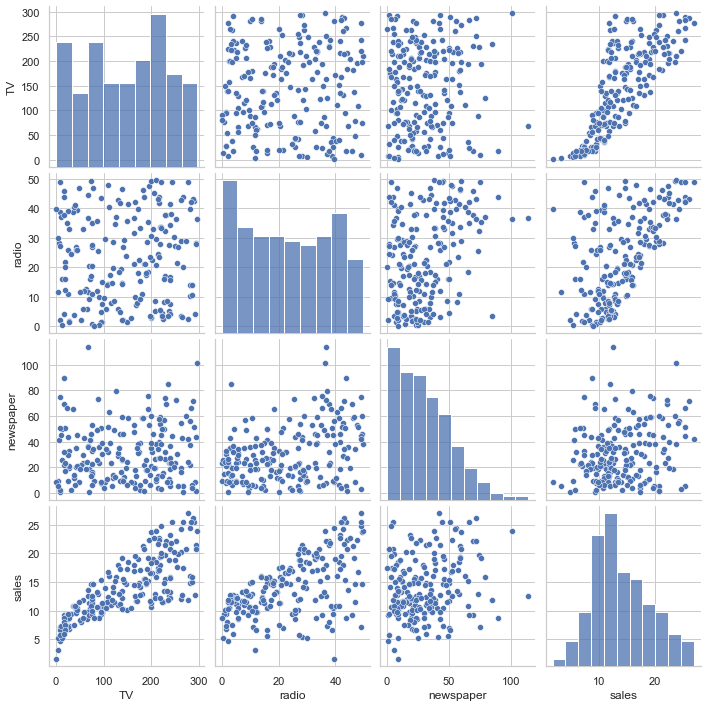

In [26]:
sns.pairplot(df, size=2.5)
plt.show()

In [27]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

there is skewness present in the dataset.

In [28]:
df['newspaper']=np.sqrt(df['newspaper'])

In [29]:
df['newspaper'].skew()

0.06238771883281062

In [30]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

### Now splitting the data

In [31]:
X=df.drop(columns=['sales'])
y=df[['sales']]

In [32]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989


In [33]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


### Bring all features to a common scale

In [34]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x= sc.fit_transform(X)

In [35]:
x=pd.DataFrame(data=x,columns=X.columns)
x

,TV,radio,newspaper
0,0.969852,0.981522,1.563095
1,-1.197376,1.082808,0.774855
2,-1.516155,1.528463,1.566049
3,0.052050,1.217855,1.233576
4,0.394182,-0.841614,1.230360
...,...,...,...
195,-1.270941,-1.321031,-0.700730
196,-0.617035,-1.240003,-1.127935
197,0.349810,-0.942899,-1.283433
198,1.594565,1.265121,1.473445


In [36]:
x.shape

(200, 3)

In [37]:
y.shape

(200, 1)

###  Splitting the data for training & testing

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train ,x_test ,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=43)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140, 1)
(60, 1)


### Model selection using various Regressiom (Linear Reg, Random Forest, Decision Tree, Lasso,Ridge, SVR,KNeighbors)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

import joblib

In [42]:
LR=LinearRegression()
sv=SVR()
rf=RandomForestRegressor(n_estimators=50)
knn=KNeighborsRegressor()
dtr=DecisionTreeRegressor()
ls=Lasso(alpha=0.001)
rd=Ridge(alpha=0.001)

In [43]:
model=[LR,sv,rf,knn,dtr,ls,rd]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("The Mean absolute error value of ",m ,"is. ")
    print("Mean absolute error: " , mean_absolute_error(y_test,predm))
    print()
    print("The Mean squared error value of ",m ,"is. ")
    print("Residual sum of squares (MSE): " , mean_squared_error(y_test,predm))
    print()
    print("The r2_score value of ",m ,"is. ")
    print("R2-score of : " , r2_score(y_test,predm))
    print()
    print("Now check with Cross validation\n")
    
    score=cross_val_score(m,x,y,cv=5)
    print("The score after cross_validation : ",score)
    print("The Mean score after cross_validation : ",score.mean())
    print('\n')

The Mean absolute error value of  LinearRegression() is. 
Mean absolute error:  1.2200578204021113

The Mean squared error value of  LinearRegression() is. 
Residual sum of squares (MSE):  2.234026948108086

The r2_score value of  LinearRegression() is. 
R2-score of :  0.9223377779877505

Now check with Cross validation

The score after cross_validation :  [0.87809171 0.91744186 0.92982697 0.81591747 0.89538764]
The Mean score after cross_validation :  0.8873331295445761


The Mean absolute error value of  SVR() is. 
Mean absolute error:  1.0376432411770817

The Mean squared error value of  SVR() is. 
Residual sum of squares (MSE):  2.717265659829664

The r2_score value of  SVR() is. 
R2-score of :  0.905538789888517

Now check with Cross validation

The score after cross_validation :  [0.88956967 0.94537894 0.93658432 0.80887294 0.92557096]
The Mean score after cross_validation :  0.9011953652320344


The Mean absolute error value of  RandomForestRegressor(n_estimators=50) is. 
Mean a

### Observation:

Minimum difference in R2score and Cross validation score is for RandomForestRegressor. So this is our best model.

AS R2 score is : 0.97 and Cross validation score is : 0.97

## Hyper parameter tuning

In [46]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)
print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}


## Final modelling and evaluating using Best Parameteres.

In [47]:
m=RandomForestRegressor(n_estimators= 1400, min_samples_split= 2, min_samples_leaf= 1, max_features= 'auto', max_depth= 100, bootstrap= True)
m.fit(x_train,y_train)
predm=m.predict(x_test)
print("The Mean absolute error value of ",m ,"is. ")
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,predm))
print()
print("The Mean squared error value of ",m ,"is. ")
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_test,predm))
print()
print("The r2_score value of ",m ,"is. ")
print("R2-score of : %.2f" % r2_score(y_test,predm))
print()
print("Now check with Cross validation\n")
    
score=cross_val_score(m,x,y,cv=10)
print("The score after cross_validation : ",score)
print("The Mean score after cross_validation : ",score.mean())

The Mean absolute error value of  RandomForestRegressor(max_depth=100, n_estimators=1400) is. 
Mean absolute error: 0.74

The Mean squared error value of  RandomForestRegressor(max_depth=100, n_estimators=1400) is. 
Residual sum of squares (MSE): 0.72

The r2_score value of  RandomForestRegressor(max_depth=100, n_estimators=1400) is. 
R2-score of : 0.98

Now check with Cross validation

The score after cross_validation :  [0.98354324 0.97948011 0.98488183 0.98225257 0.97669285 0.97617714
 0.96877493 0.97785689 0.97904558 0.98647365]
The Mean score after cross_validation :  0.9795178785305042


#### The final model has an R2score of 0.98 and Cross-validation score of 0.97

### Saving the model

In [48]:
#saving the model
model=joblib.dump(m,'ADPredRF.obj')

### Conclusion

In [53]:
loaded_model= joblib.load('ADPredRF.obj')
result=loaded_model.score(x_test,y_test)
print(result)

0.9751248542356625


In [51]:
conclusion= pd.DataFrame([loaded_model.predict(x_test)[:],predm[:]],index=['Predicted','Original'])

In [52]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Predicted,6.256,13.872071,13.037143,10.914214,12.131,14.967571,25.121,9.543786,22.773143,15.043357,...,6.6235,9.838,17.670643,13.794429,13.682857,11.523429,21.193571,14.9665,7.629571,7.459714
Original,6.256,13.872071,13.037143,10.914214,12.131,14.967571,25.121,9.543786,22.773143,15.043357,...,6.6235,9.838,17.670643,13.794429,13.682857,11.523429,21.193571,14.9665,7.629571,7.459714
